In [2]:
import networkx as nx

from InfluenceGraph import *
from WordGenerator import *

### Fig 1b: Introductory example

Run example for the OTS with influence graph of agents $A=\{1,2,3\}$, edges $E=\{a,b,c,d\}$, influence $I_e = 1/2$ for all $e\in E$ and $\mathbf{B}_\mathrm{init}=(0,0.5,1)$.

The opinion evolution plot corresponds to the run $(abcd)^\omega$.


{'a': (1, 2), 'b': (2, 1), 'c': (2, 3), 'd': (3, 2)}


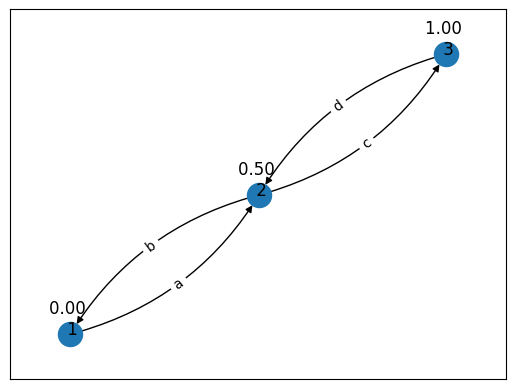

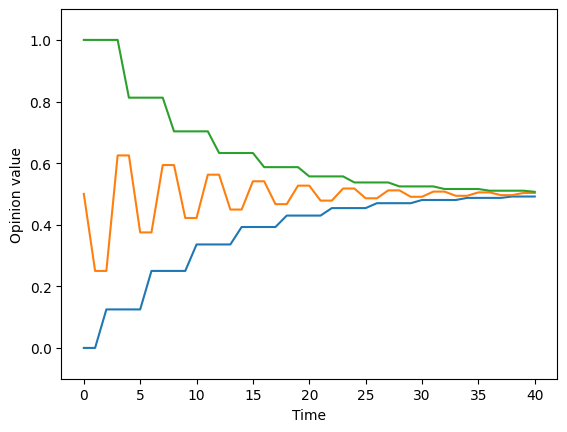

In [2]:
# Fig 1b. Introductory example

A = [1,2,3]
E = [(1,2),(2,1),(3,2),(2,3)]
B0 = [0,0.5,1]
graph = nx.DiGraph()

graph.add_nodes_from(A)
graph.add_edges_from(E)


G = InfluenceGraph(len(A), ops=B0, G=graph)
G.draw()
print(G.labels)

w = "abdc"*10
G.execute_word(w)

G.plot_opinion_evolution()


### Fig 1c: Introductory random example

Run example for a randomly generated OTS with a $G=(A,E,I)$, $A=\{1,\ldots,11\}$,  $I_e= 0.5$ for each $e \in E$, $\mathbf{B}_\mathrm{init}=(0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)$. Each edge of $G$ is generated with prob. $0.3$. The edges of the (partial) run were uniformly chosen from $E$.

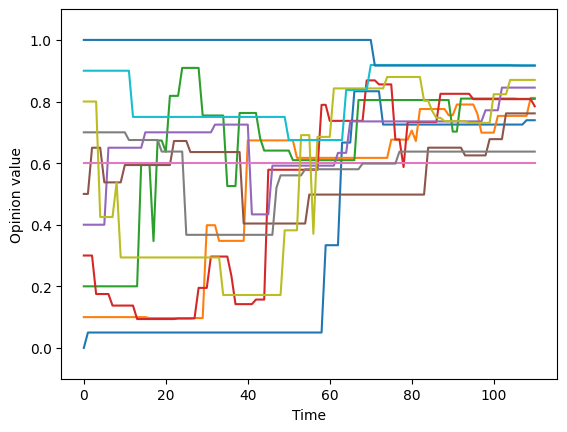

In [3]:
# Fig 1c. Random Erdos-Renyi graph

n = 11
p = 0.3
B0 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

G = InfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0)

word_len = 10*n
w = generate_random_word(G, word_len)
G.execute_word(w)

G.plot_opinion_evolution()

### Fig 2b: Run counterexample of consensus without strong-connectivity

Influence graph with $I_e = 1/2$ for all $e\in E$ and $\mathbf{B}_\mathrm{init}=(0.4,0.5,0.45, 0.55, 0.5,0.6)$ with the run $((a_2a_3)^5(a_4a_5)^5(a_0a_1)^5(a_6a_7a_8a_9))^\omega$

{'a': (1, 2), 'b': (1, 3), 'c': (2, 1), 'd': (2, 4), 'e': (3, 4), 'f': (4, 3), 'g': (5, 6), 'h': (5, 3), 'i': (6, 5), 'j': (6, 4)}


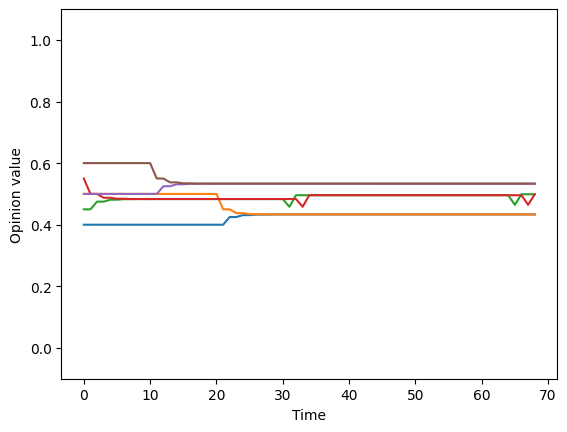

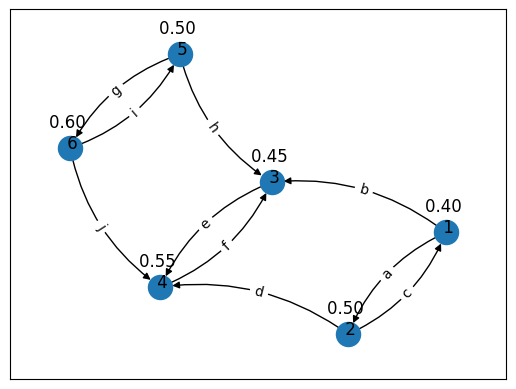

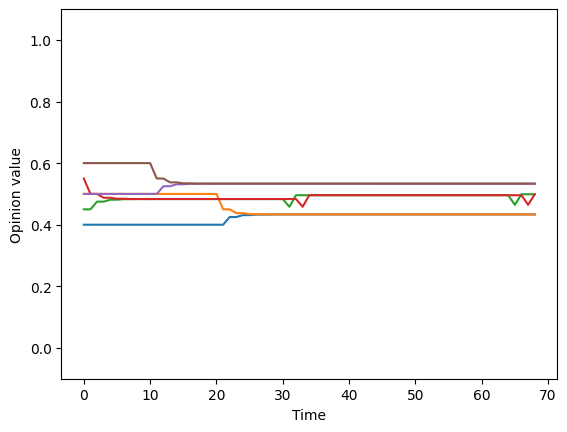

In [4]:
# Fig 2b: Strong connectivity counterexample

A = [1,2,3,4,5,6]
E = [(1,2), (2,1), (3,4), (4,3), (5,6), (6,5), (6,4), (5,3), (1,3), (2,4)]
B0 = [0.4, 0.5, 0.45, 0.55, 0.5, 0.6]

graph = nx.DiGraph()
graph.add_nodes_from(A)
graph.add_edges_from(E)

G = InfluenceGraph(6, ops=B0, G=graph)

G.draw()
print(G.labels)

#equivalent to (a_2a_3)^5(a_4a_5)^5(a_0a_1)^5(a_6a_7a_8a_9)
round = "ef"*5+"gi"*5+"ac"*5+"bhdj"
w = round*2
G.execute_word(w)

G.plot_opinion_evolution()

### Fig 2c: Counterexample of consensus with puppets

Run example for the OTS with influence graph of agents $A=\{1,2,3\}$, edges $E=\{a,b,c,d\}$, $\mathbf{B}_\mathrm{init}=(0,0.5,1)$ influence $I_e = 1$ for all $e\in E$ .

The opinion evolution plot corresponds to the run $(abcd)^\omega$.

{'a': (0, 1), 'b': (1, 0), 'c': (1, 2), 'd': (2, 1)}


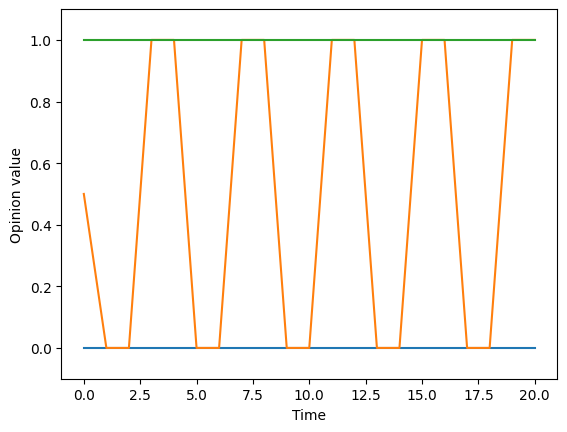

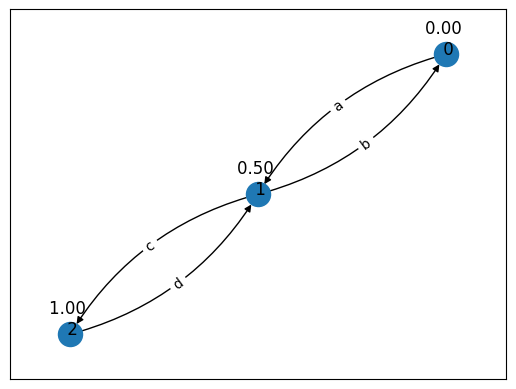

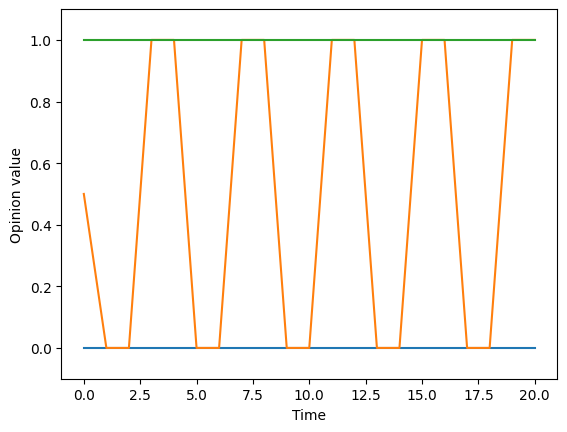

In [6]:
# Fig 2c: puppets counter example

g = nx.DiGraph([(0,1),(1,0),(2,1),(1,2)])

puppet_influence = lambda g,e: 1

G = InfluenceGraph(4, ops=[0,0.5,1], G=g, influence_fn=puppet_influence)
nodes = 3
G.draw()
print(G.labels)

w = "abdc"*5
G.execute_word(w)

G.plot_opinion_evolution()

### Fig 3a: Counterexample of consensus with strong fairness

Run example for the OTS with influence graph of agents $A=\{1,2,3\}$, edges $E=\{a,b,c,d\}$, $\mathbf{B}_\mathrm{init}=(0,0.5,1)$ influence $I_e = 0.5$ for all $e\in E$ .

The opinion evolution plot corresponds to the run $u=(a^{n}bc^{n}d)_{n\in\mathbb{N}^+}$.

{'a': (1, 2), 'b': (2, 1), 'c': (2, 3), 'd': (3, 2)}
abdcaabddcaaabdddcaaaabddddcaaaaabdddddcaaaaaabddddddcaaaaaaabdddddddcaaaaaaaabddddddddcaaaaaaaaabdddddddddc


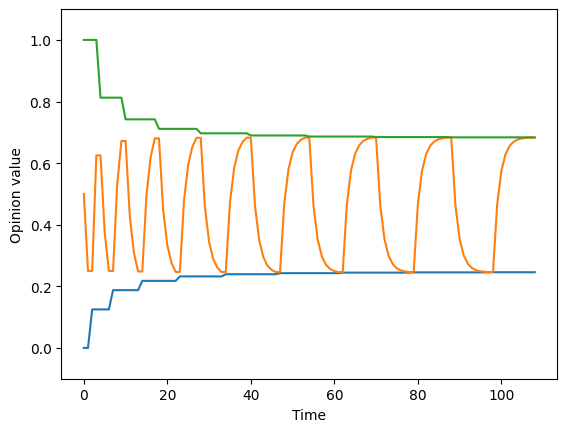

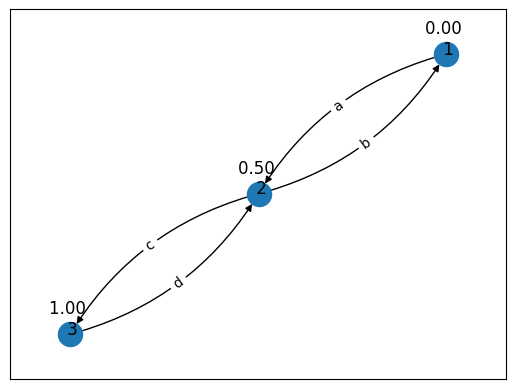

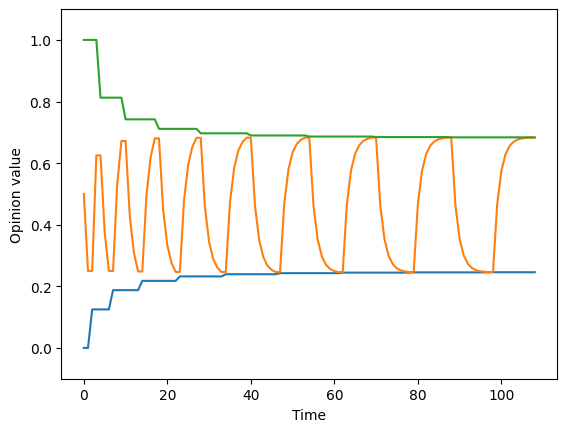

In [9]:
# Fig 3a. strong fairness counterexample 1 a^nbd^nc

iterations = 100

A = [1,2,3]
E = [(1,2),(2,1),(2,3),(3,2),]
B0 = [0,0.5,1]
graph = nx.DiGraph()

graph.add_nodes_from(A)
graph.add_edges_from(E)


G = InfluenceGraph(len(A), ops=B0, G=graph)
G.draw()
print(G.labels)

w = ''
n = 1

while len(w) < iterations:
    w += (n*"a")+"b"+(n*"d")+"c"
    n = n + 1

print(w)

G.execute_word(w)

G.plot_opinion_evolution()


### Fig 3b: Another counterexample of consensus with strong fairness

Run example for the OTS with influence graph of agents $A=\{1,2,3\}$, edges $E=\{a,b,c,d\}$, $\mathbf{B}_\mathrm{init}=(0,0.5,1)$ and influence $I_e = 0.5$ for all $e\in E$ .

The opinion evolution plot corresponds to the run generated by construction 10 of the article.

{'a': (1, 2), 'b': (2, 1), 'c': (2, 3), 'd': (3, 2)}
abddcaaabdddcaaabdddcaaaabdddcaaaaabddddcaaaaaabdddddcaaaaaabddddddcaaaaaaabddddddcaaaaaaabdddddddcaaaaaaaabddddddddc


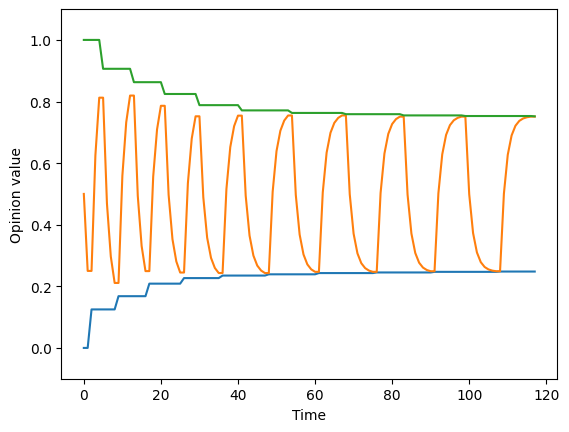

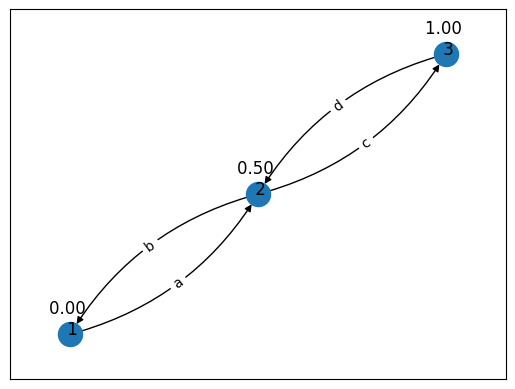

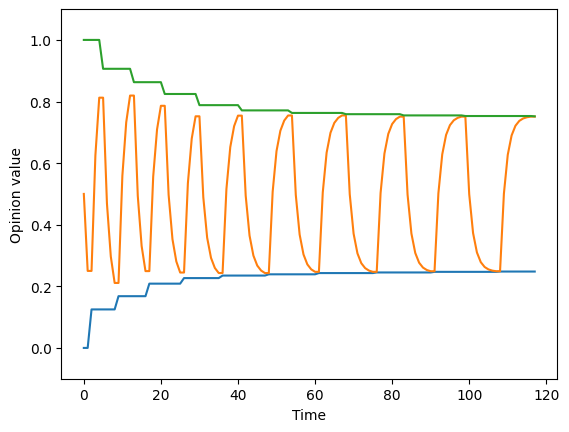

In [18]:
# Fig 3b. strong fairness counterexample 2 pulling
iterations = 100

A = [1,2,3]
E = [(1,2),(2,1),(2,3),(3,2),]
B0 = [0,0.5,1]
graph = nx.DiGraph()

graph.add_nodes_from(A)
graph.add_edges_from(E)


G = InfluenceGraph(len(A), ops=B0, G=graph)
G.draw()
print(G.labels)

L=0.25
U=0.75

w = ""
a_calls = []
c_calls = []
while len(w) < iterations:
    i = 0
    j = 0
    while G.opinion[2] > L:
        G.execute_edge((1,2))
        w += "a"
        i+=1
    a_calls.append(i)
    G.execute_edge((2,1))
    w += "b"
    while G.opinion[2] < U:
        G.execute_edge((3,2))
        w += "d"
        j+=1
    c_calls.append(j)
    G.execute_edge((2,3))
    w += "c"

print(w)

G.plot_opinion_evolution()

### Fig 4b: counterexample of consensus with 1-bounded fairness

Run example for the OTS with influence graph of agents $A=\{1,2,3,4\}$, edges $E=\{a,b,c,d,e,f\}$, $\mathbf{B}_\mathrm{init}=(0.0,0.2,0.8,1.0)$ and influence $I_e = 0.5$ for all $e\in E$.

The opinion evolution plot corresponds to the run generated by construction 21 of the article, with $L=0.2$ and $U=0.8$.

{'a': (1, 2), 'b': (2, 1), 'c': (2, 3), 'd': (3, 2), 'e': (3, 4), 'f': (4, 3)}
['b', 'e', 'c', 'a', 'd', 'f', 'a', 'a', 'f', 'f', 'b', 'e', 'c', 'a', 'd', 'f', 'a', 'a', 'f', 'f', 'b', 'e', 'c', 'a', 'd', 'f', 'a', 'a', 'f', 'f', 'b', 'e', 'c', 'a', 'd', 'f', 'a', 'a', 'a', 'f', 'f', 'f', 'b', 'e', 'c', 'a', 'd', 'f', 'a', 'a', 'a', 'a', 'f', 'f', 'f', 'f', 'b', 'e', 'c', 'a', 'd', 'f', 'a', 'a', 'a', 'a', 'a', 'f', 'f', 'f', 'f', 'b', 'e', 'c', 'a', 'd', 'f', 'a', 'a', 'a', 'a', 'a', 'f', 'f', 'f', 'f', 'b', 'e', 'c', 'a', 'd', 'f', 'a', 'a', 'a', 'a', 'a', 'a', 'f', 'f', 'f', 'f', 'f']


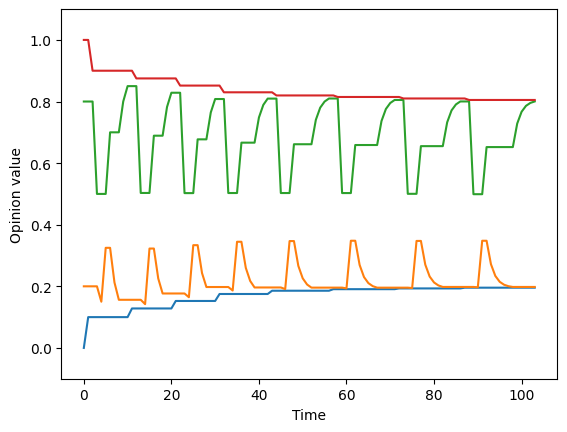

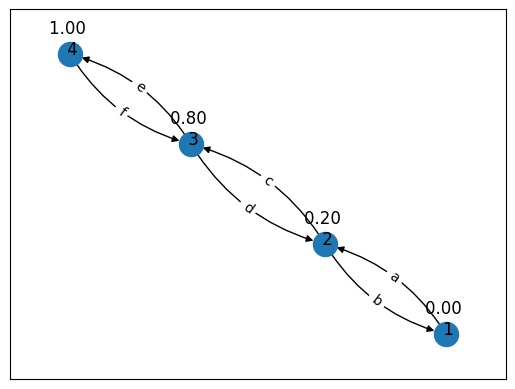

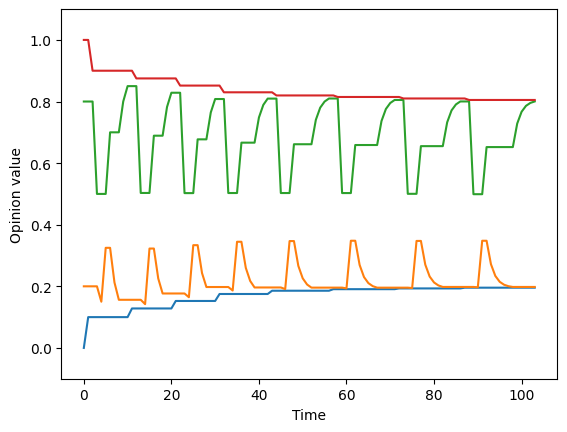

In [23]:
# Figure 4b. 1-BF counterexample
iterations = 100

A = [1,2,3,4]
E = [(1,2), (2,1),(2,3), (3,2), (3,4), (4,3)]

g = nx.DiGraph()
g.add_nodes_from(A)
g.add_edges_from(E)

G = InfluenceGraph(len(A), ops=[0.0,0.2,0.8,1.0], G=g)

G.draw()
print(G.labels)

U = 0.8
L = 0.2

word = []
fair_window = 'becadf'
while len(word) < iterations:
    G.execute_word(fair_window)
    word += fair_window
    while G.opinion[2] >= L:
        G.execute_edge((1,2))
        word.append('a')
    while G.opinion[3] <= U:
        G.execute_edge((4,3))
        word.append('f')

print(word)

G.plot_opinion_evolution()

### Fig 4c: Example of consensus with 3-bounded fairness

Run example for the OTS with influence graph of agents $A=\{1,2,3,4\}$, edges $E=\{a,b,c,d,e,f\}$, $\mathbf{B}_\mathrm{init}=(0.0,0.2,0.8,1.0)$ and influence $I_e = 0.5$ for all $e\in E$.

The opinion evolution plot corresponds to the run $((becadf)^3 a^{10}f^{10})^\omega$ which is 3-bounded fair.

{'a': (1, 2), 'b': (2, 1), 'c': (2, 3), 'd': (3, 2), 'e': (3, 4), 'f': (4, 3)}
['b', 'e', 'c', 'a', 'd', 'f', 'b', 'e', 'c', 'a', 'd', 'f', 'b', 'e', 'c', 'a', 'd', 'f', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'b', 'e', 'c', 'a', 'd', 'f', 'b', 'e', 'c', 'a', 'd', 'f', 'b', 'e', 'c', 'a', 'd', 'f', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'b', 'e', 'c', 'a', 'd', 'f', 'b', 'e', 'c', 'a', 'd', 'f', 'b', 'e', 'c', 'a', 'd', 'f', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f']


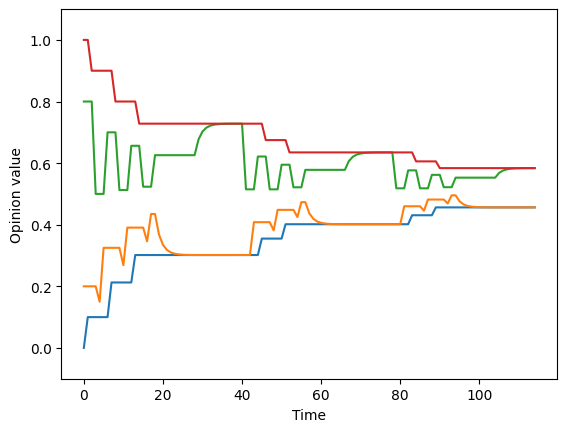

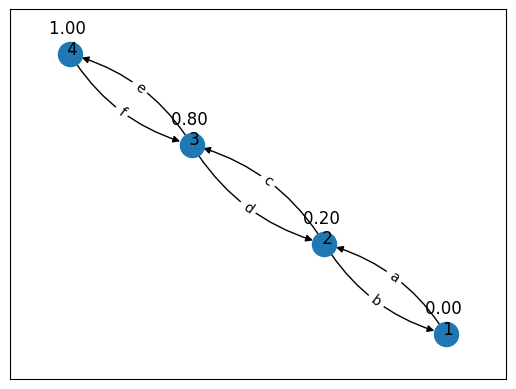

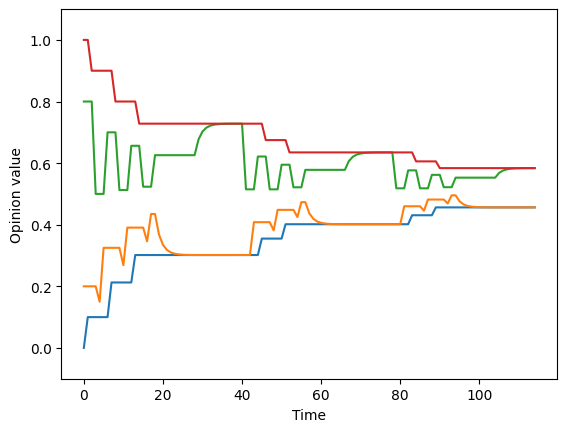

In [14]:
# Figure 4c. 3-BF consensus example
iterations = 100

A = [1,2,3,4]
E = [(1,2), (2,1),(2,3), (3,2), (3,4), (4,3)]

g = nx.DiGraph()
g.add_nodes_from(A)
g.add_edges_from(E)

G = InfluenceGraph(len(A), ops=[0.0,0.2,0.8,1.0], G=g)

G.draw()
print(G.labels)

U = 0.8
L = 0.2

word = []
fair_window = 'becadf'
v = fair_window*3 + 'a'*10 + 'f'*10
while len(word) < iterations:
    G.execute_word(v)
    word += v
    

print(word)

G.plot_opinion_evolution()

### Fig 5c: Counterexample of consensus with dynamic influence, influence approaches 0

Run example for the DOTS with influence graph of agents $A=\{1,2\}$, edges $E=\{a,b\}$, $\mathbf{B}_\mathrm{init}=(0,1)$  and the dynamic influence function 

$$I^\mathbf{B}_a = \left[ \frac{U- \mathbf{B}_\mathrm{2}}{2 (\mathbf{B}_\mathrm{1}-\mathbf{B}_\mathrm{2})} \right]_0^1, I^\mathbf{B}_b = \left[ \frac{L- \mathbf{B}_\mathrm{1}}{2 (\mathbf{B}_\mathrm{2}-\mathbf{B}_\mathrm{1})}\right]_0^1$$

for $L=0.2$ and $U=0.8$ and a clamp function for $[0,1]$ which is defined as $[r]_0^1 = \min(\max(r,0),1)$ for any $r\in\mathbb{R}$. The opinion evolution plot corresponds to the run $(ab)^\omega$

{'a': (1, 2), 'b': (2, 1)}


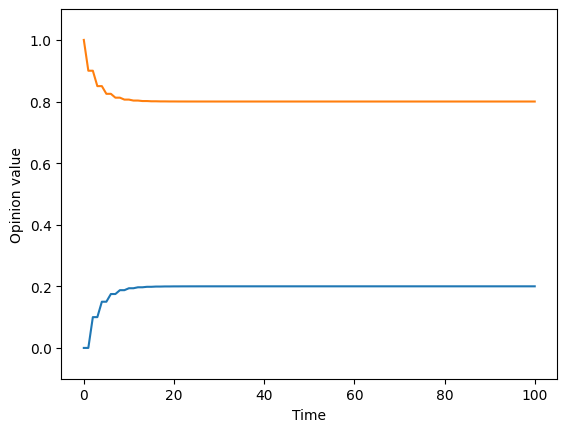

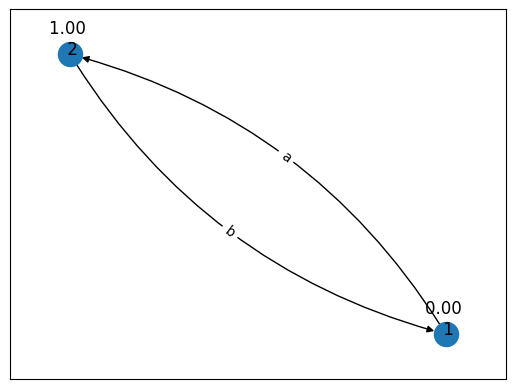

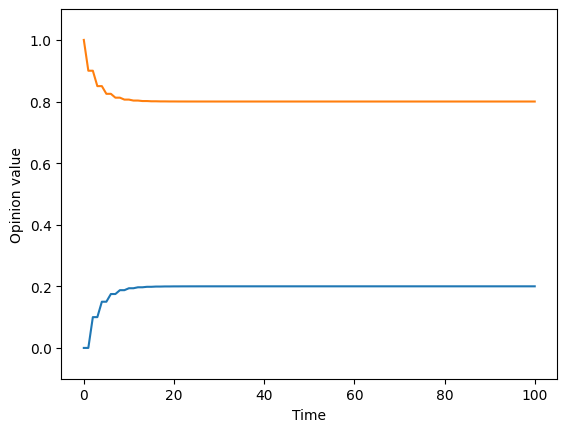

In [16]:
# Figure 5c. Counterexample with dynamic influence, influence approaching 0
iterations = 100

A = [1,2]
E = [(1,2), (2,1)]
g = nx.DiGraph(E)

U = 0.8
L = 0.2

inf_history_x = {e:[] for e in E}
inf_history_y = {e:[] for e in E}


def clamp(x, lower_bound, upper_bound):
    return min(max(abs(x),lower_bound),upper_bound)

def approaching_0(G, edge):
    if edge == (1,2):
        num = U - G.opinion[2]
        den = 2*(G.opinion[1] - G.opinion[2])
    elif edge == (2,1):
        num = L - G.opinion[1]
        den = 2*(G.opinion[2] - G.opinion[1])
    inf = clamp(num/den, 0, 1)
    inf_history_x[edge].append(len(G.history))
    inf_history_y[edge].append(inf)
    return inf

G = InfluenceGraph(len(A), ops=[0.0,1.0], G=g, influence_fn=approaching_0)

G.draw()
print(G.labels)

word = "ab"*(iterations//2)

G.execute_word(word)

G.plot_opinion_evolution()

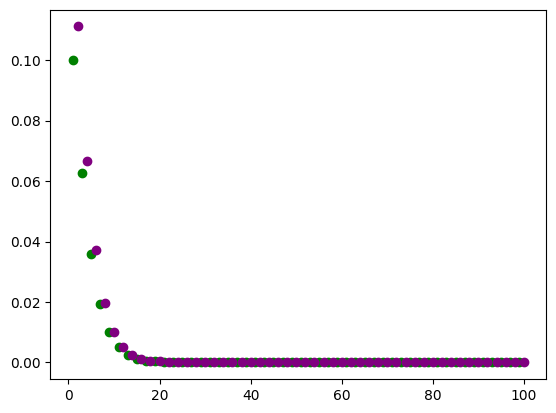

In [17]:
# Fig 5d. Plots of dynamic influences approaching 0

plt.scatter(inf_history_x[(1,2)], inf_history_y[(1,2)], color="green")
plt.scatter(inf_history_x[(2,1)], inf_history_y[(2,1)], color="purple")

### Fig 5d: Counterexample of consensus with dynamic influence, influence approaches 1

Run example for the DOTS with influence graph of agents $A=\{1,2,3\}$, edges $E=\{a,b,c,d\}$, $\mathbf{B}_\mathrm{init}=(0,0.5,1)$  and the dynamic influence function 


$$I^\mathbf{B}_d  = I^\mathbf{B}_b = 0.5 \text{ and } I^\mathbf{B}_a  = \left[ \frac{\frac{1}{2}(\mathbf{B}_\mathrm{1}+L)-\mathbf{B}_\mathrm{2}}{\mathbf{B}_\mathrm{1}-\mathbf{B}_\mathrm{2}}\right]_0^1 \text{, } I^\mathbf{B}_c  = \left[ \frac{\frac{1}{2}(\mathbf{B}_\mathrm{3}+U)-\mathbf{B}_\mathrm{2}}{\mathbf{B}_\mathrm{3}-\mathbf{B}_\mathrm{2}}\right]_0^1$$

with $L=0.2$ and $U=0.8$. The opinion evolution plot corresponds to the run $(abcd)^\omega$.

{'a': (1, 2), 'b': (2, 1), 'c': (2, 3), 'd': (3, 2)}


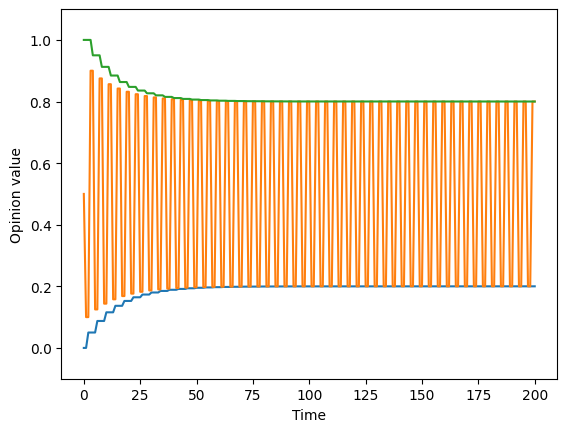

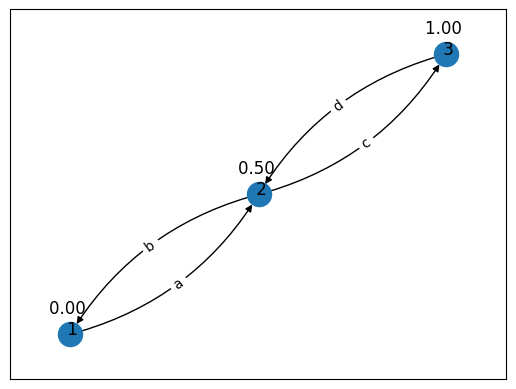

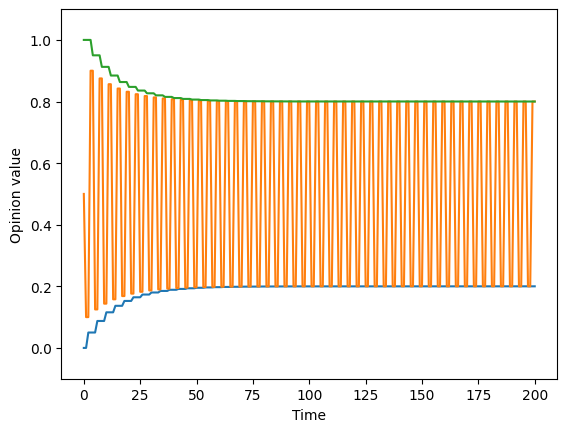

In [21]:
# Figure 5d. Counterexample with dynamic influence, influence approaching 1
iterations = 100

A = [1,2,3]
E = [(1,2), (2,1), (3,2), (2,3)]
g = nx.DiGraph(E)

U = 0.8
L = 0.2

inf_history_x = {e:[] for e in E}
inf_history_y = {e:[] for e in E}

def clamp(x, lower_bound, upper_bound):
    return min(max(abs(x),lower_bound),upper_bound)

def approaching_1(G, edge):
    if edge == (1,2):
        num = 0.5 *(G.opinion[1]+L) - G.opinion[2]
        den = G.opinion[1] - G.opinion[2]
        inf = num/den
    elif edge == (3,2):
        num = 0.5 *(G.opinion[3]+U) - G.opinion[2]
        den = G.opinion[3] - G.opinion[2]
        inf = num/den
    elif edge == (2,1) or edge == (2,3):
        inf = 0.5
    inf_history_x[edge].append(len(G.history))
    inf_history_y[edge].append(inf)
    return clamp(inf, 0, 1)


G = InfluenceGraph(len(A), ops=[0.0,0.5,1.0], G=g, influence_fn=approaching_1)

G.draw()
print(G.labels)

word = "abdc"*(iterations//2)

G.execute_word(word)

G.plot_opinion_evolution()

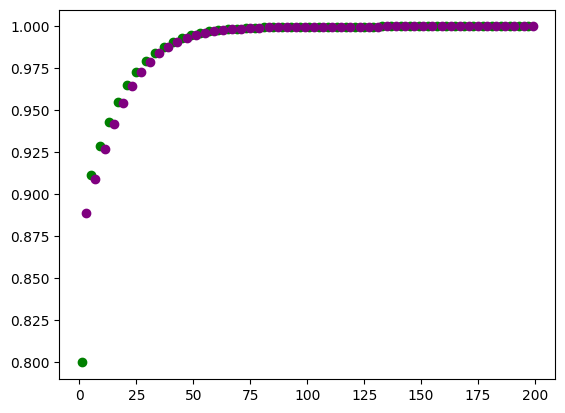

In [22]:
# Fig 5d. Plots of dynamic influences approaching 1

plt.scatter(inf_history_x[(1,2)], inf_history_y[(1,2)], color="green")
plt.scatter(inf_history_x[(3,2)], inf_history_y[(3,2)], color="purple")